In [3]:
#pip install imbalanced-learn

  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from imblearn.under_sampling import NearMiss

In [2]:
df = pd.read_csv("../data/raw/water_potability.csv")

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [10]:
Potability_df = pd.DataFrame(df.groupby('Potability')['Potability'].count())

p_0 = np.round((df.groupby('Potability')['Potability'].count()[0]/ df.shape[0]) * 100,2)
p_1 = np.round((df.groupby('Potability')['Potability'].count()[1]/ df.shape[0]) * 100,2)

Potability_df.insert(loc = 0, column = "%Distribution", value = [p_0,p_1])
Potability_df


%Distribution  Potability
Potability                           
0                   60.99        1998
1                   39.01        1278

In [11]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

### Visualization Chart for the features

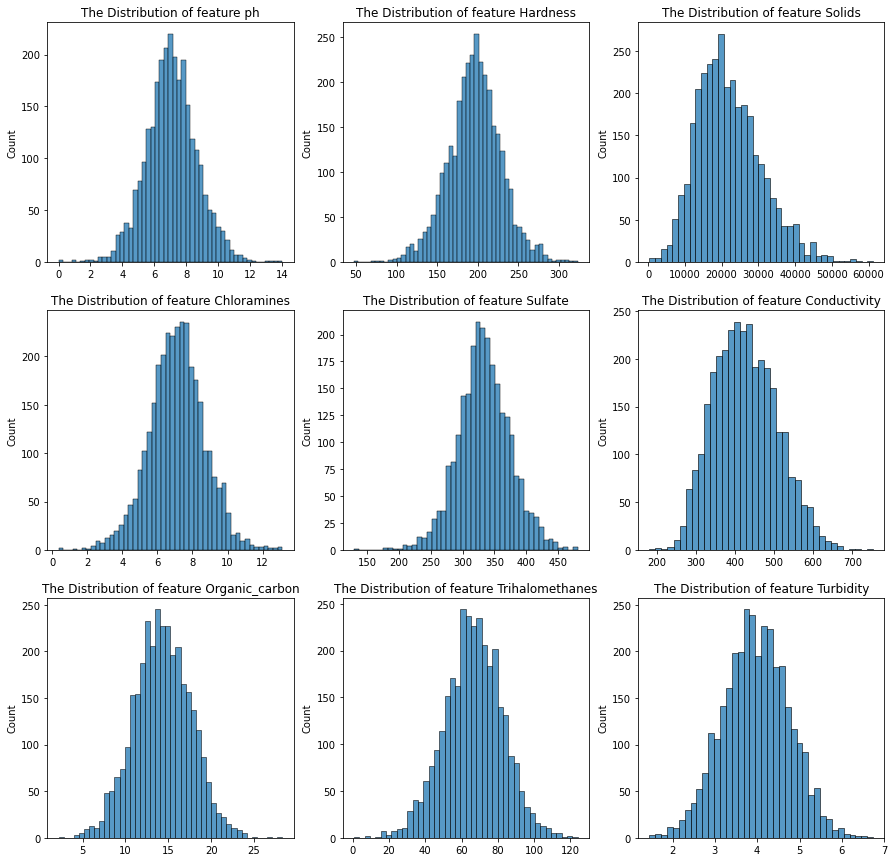

In [12]:
f, ax = plt.subplots(3,3, figsize = (15,15))
k = 0

for i in range(0,3):
    for j in range(0,3):
        sns.histplot(data = df.iloc[:,k], ax = ax[i,j])
        ax[i,j].set_title(f"The Distribution of feature {df.columns[k]}")
        ax[i,j].set(xlabel=None)
        k += 1
plt.show()

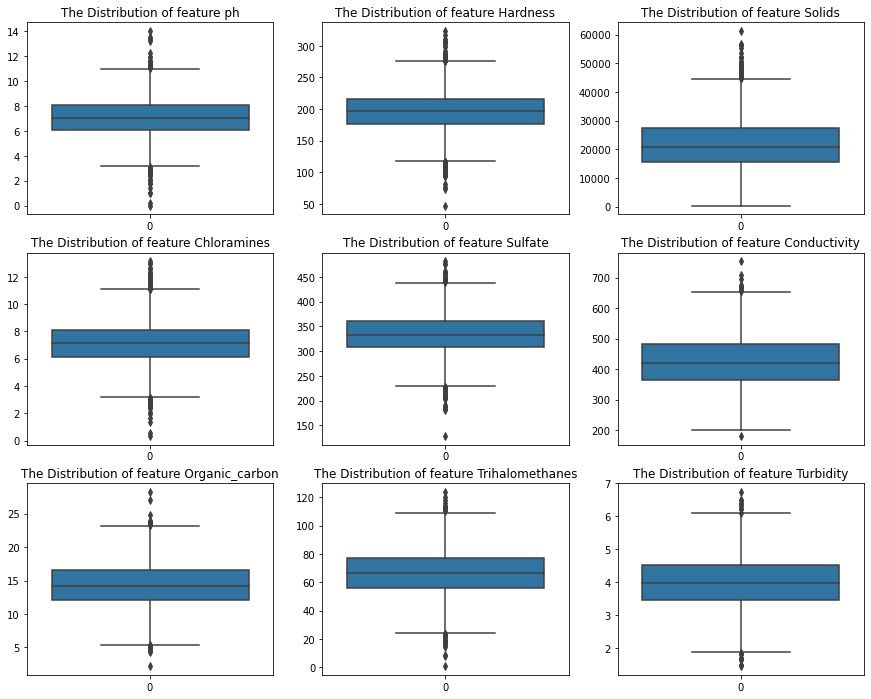

In [13]:
f, ax = plt.subplots(3,3, figsize = (15,12))
k = 0

for i in range(0,3):
    for j in range(0,3):
        sns.boxplot(data = df.iloc[:,k], ax = ax[i,j])
        ax[i,j].set_title(f"The Distribution of feature {df.columns[k]}")
        k += 1
plt.show()

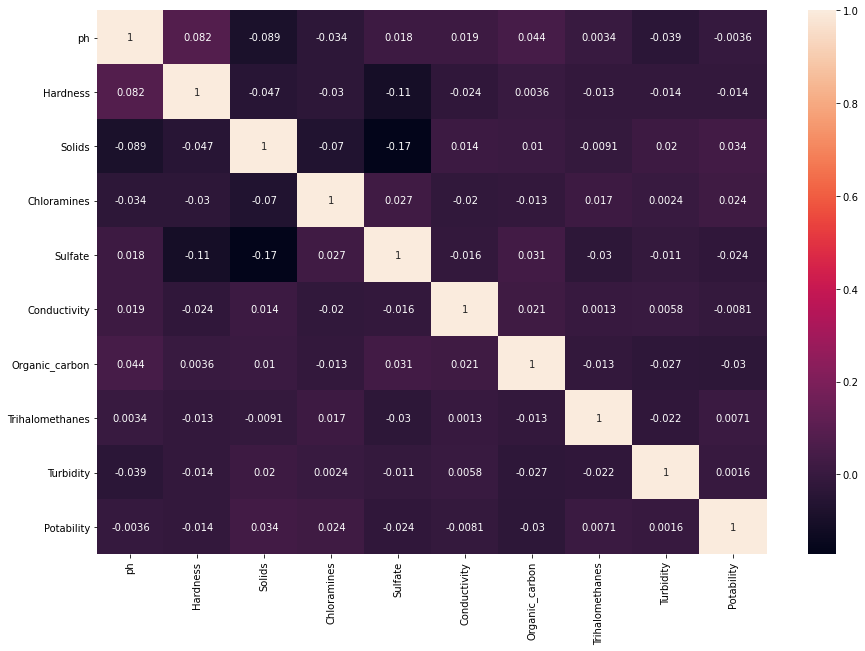

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [15]:
import scipy.stats as stat
import pylab

def plotData(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

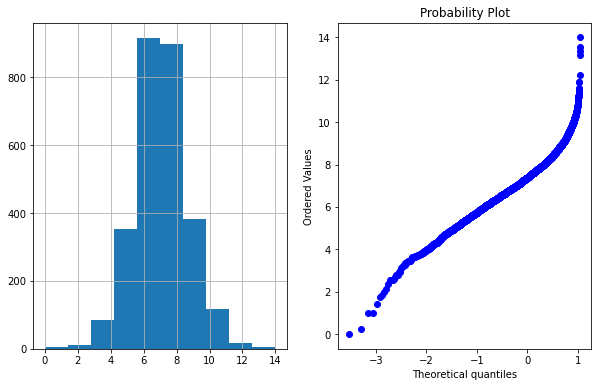

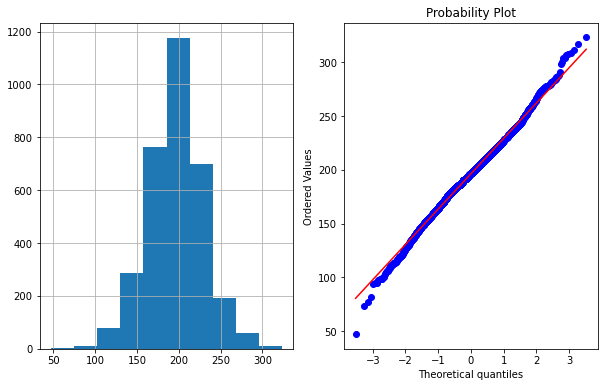

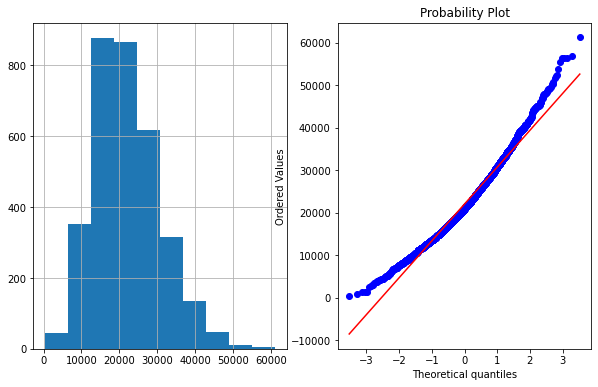

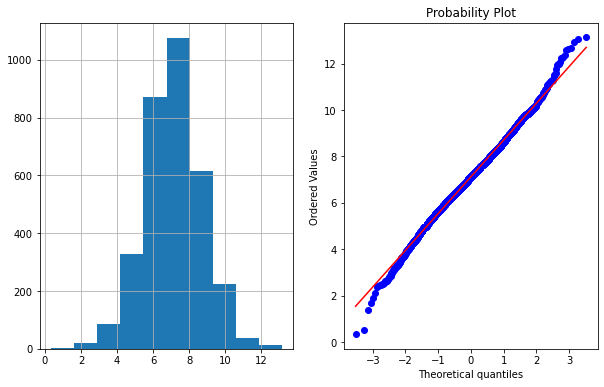

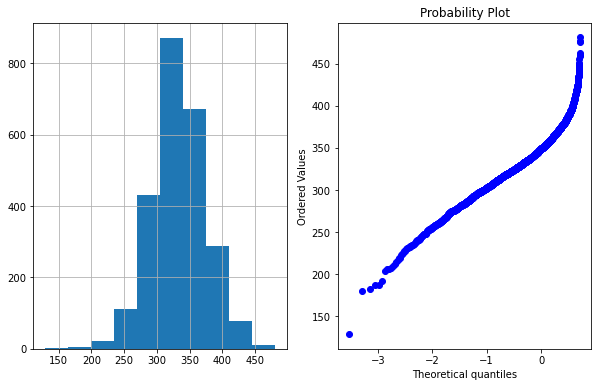

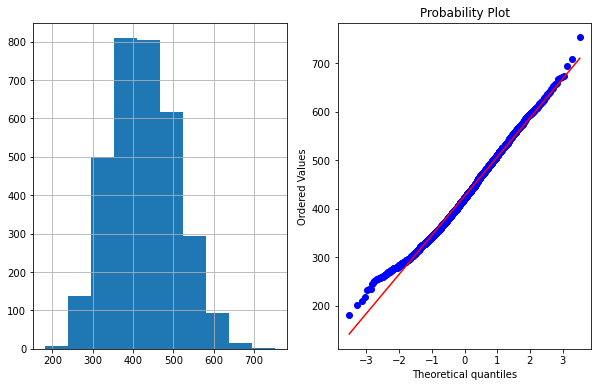

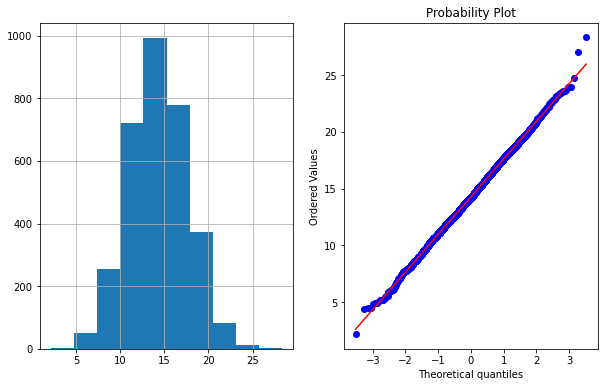

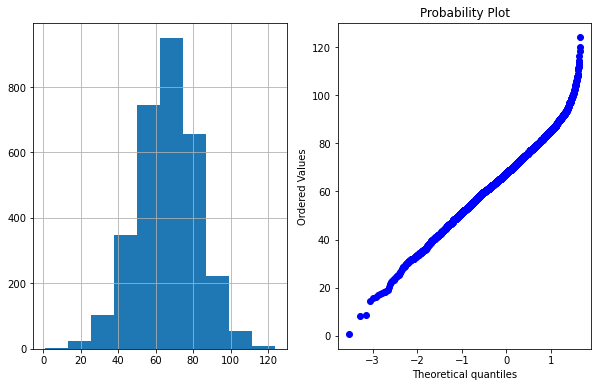

In [16]:
for i in range(0,8):
    plotData(df, df.columns[i])

## Portability 1 Analysis

In [17]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [18]:
df_1 = df[df["Potability"] == 1]
df_1.describe().T

count          mean          std         min           25%  \
ph               1101.0      7.073783     1.448048    0.227499      6.179312   
Hardness         1278.0    195.800744    35.547041   47.432000    174.330531   
Solids           1278.0  22383.991018  9101.010208  728.750830  15668.985035   
Chloramines      1278.0      7.169338     1.702988    0.352000      6.094134   
Sulfate           985.0    332.566990    47.692818  129.000000    300.763772   
Conductivity     1278.0    425.383800    82.048446  201.619737    360.939023   
Organic_carbon   1278.0     14.160893     3.263907    2.200000     12.033897   
Trihalomethanes  1223.0     66.539684    16.327419    8.175876     56.014249   
Turbidity        1278.0      3.968328     0.780842    1.492207      3.430909   
Potability       1278.0      1.000000     0.000000    1.000000      1.000000   

                          50%           75%           max  
ph                   7.036752      7.933068     13.175402  
Hardness           196.632907    218.003420    323.124000  
Solids           21199.386614  27973.236446  56488.672413  
Chloramines          7.215163      8.199261     13.127000  
Sulfate            331.838167    365.941346    481.030642  
Conductivity       420.712729    484.155911    695.369528  
Organic_carbon      14.162809     16.356245     23.604298  
Trihalomethanes     66.678214     77.380975    124.000000  
Turbidity            3.958576      4.509569      6.494249  
Potability           1.000000      1.000000      1.000000

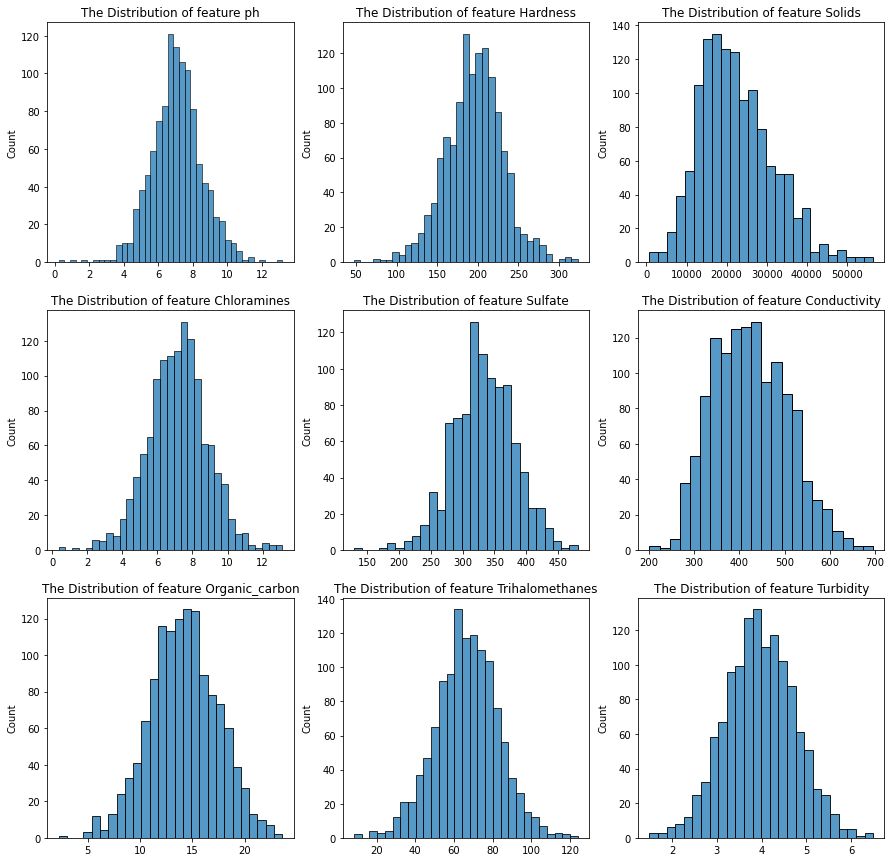

In [19]:
f, ax = plt.subplots(3,3, figsize = (15,15))
k = 0

for i in range(0,3):
    for j in range(0,3):
        sns.histplot(data = df_1.iloc[:,k], ax = ax[i,j])
        ax[i,j].set_title(f"The Distribution of feature {df_1.columns[k]}")
        ax[i,j].set(xlabel=None)
        k += 1
plt.show()

### Handling with Imbalanced Dataset

In [23]:
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import NearMiss



In [38]:
for feature in df.columns.values:
    df.loc[df[feature].isnull(), feature] = df[feature].mean()
    
x_train, x_test, y_train, y_test = train_test_split(df.drop('Potability', axis = 1), df['Potability'], test_size = 0.2,                                                             random_state = 0)
ns = NearMiss(sampling_strategy= 0.7)
x_train_ns, y_train_ns = ns.fit_resample(x_train, y_train)
print('The number of classes before under sampling: {}'.format(Counter(y_train)))
print('The number of classes after under sampling: {}'.format(Counter(y_train_ns)))


The number of classes before under sampling: Counter({0.0: 1586, 1.0: 1034})
The number of classes after under sampling: Counter({0.0: 1477, 1.0: 1034})
